**Table of contents**<a id='toc0_'></a>    
- [Import Statements](#toc1_1_)    
- [Exploring relationships in data](#toc2_)    
  - [*Patterns over time*](#toc2_1_)    
  - [*Correlation (relationship between numerical variables)*](#toc2_2_)    
  - [*Exploring categorical realtionships*](#toc2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import Statements](#toc0_)

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc2_'></a>[Exploring relationships in data](#toc0_)

### <a id='toc2_1_'></a>[*Patterns over time*](#toc0_)

If the data contains date columns then we should explore whether there are some patterns in the data that emerges over time.

- Either use `pd.to_datetime()` to convert an already existing date column to datetime format or define `parse_dates` parameter while reading the csv file with `pd.read_csv()` method.

- We may want to analyze time data to see if there are some seasonal patterns. We can use `.dt.year`, `.dt.month`, `.dt.day` etc. to extract the year, month, day etc. from the date columns. Then we can use `.groupby()` to group the data by the extracted columns and then use `.agg()` to calculate some descriptive statistics. We can also use `.resample()` to group the data by a certain time period (e.g, month, year etc.) and then use `.agg()` to calculate some descriptive statistics. We can also use `.rolling()` to calculate some rolling statistics (e.g, rolling mean, rolling median etc.) and then plot them to see if there are any patterns (`lineplot` is a good choice for such plots).

In [5]:
divorce = pd.read_csv("../datasets/divorce.csv", parse_dates=["divorce_date", "dob_man", "dob_woman", "marriage_date"])

In [6]:
divorce.shape

(2209, 10)

In [7]:
divorce.columns

Index(['divorce_date', 'dob_man', 'education_man', 'income_man', 'dob_woman',
       'education_woman', 'income_woman', 'marriage_date', 'marriage_duration',
       'num_kids'],
      dtype='object')

In [8]:
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   datetime64[ns]
 1   dob_man            2209 non-null   datetime64[ns]
 2   education_man      2205 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   datetime64[ns]
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   datetime64[ns]
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
dtypes: datetime64[ns](4), float64(4), object(2)
memory usage: 172.7+ KB


In [9]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


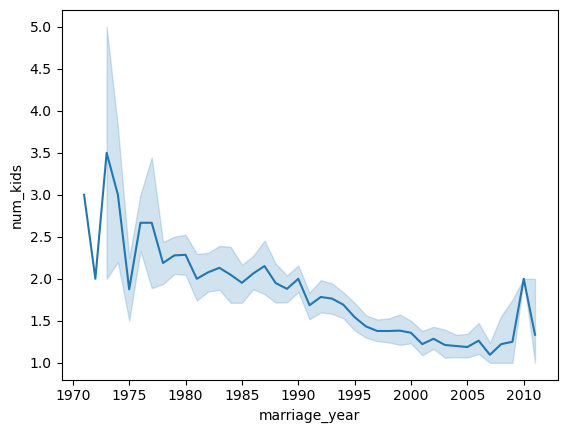

In [10]:
# Let's say we want to know whether the year that a couple got married have a relationship with the 
# number of children that the couple has at the time of divorce?

divorce["marriage_year"] = divorce["marriage_date"].dt.year

# a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

It looks like couples who had later marriage years also had fewer children during their marriage. But we'll need to explore further to gather more evidence before we can say anything conclusive.

### <a id='toc2_2_'></a>[*Correlation (relationship between numerical variables)*](#toc0_)

Covariance is a measure of how much two random variables vary together. The correlation is a normalized measure of covariance. It is used for quantitative measurement of the statistical dependence between two numerical random variables. It describes the direction and strength of relationship between the two numrical variables.

- To see the correlation between the numerical variables in a dataframe as a table we can use the `.corr()` method. We can visualize the result with a `heatmap`.
- Note that, the `.corr()` method describes the linear relationship between two variables. It is not a complete measure of correlation. That's why it's always a good idea to plot the data to see the relationship between the variables. To do this we can use `scatterplot, regplot, pairplot` etc. 

In [11]:
divorce.select_dtypes("number").corr()

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


<Axes: >

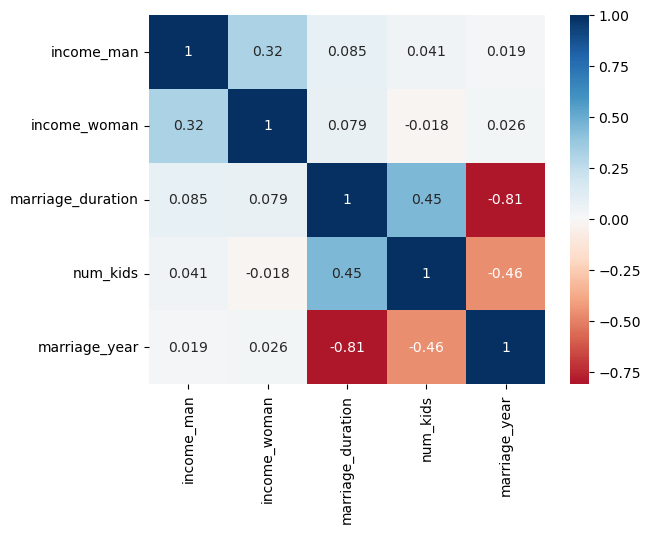

In [12]:
sns.heatmap(divorce.select_dtypes("number").corr(), annot=True, cmap="RdBu", center=0)

In [13]:
divorce.loc[:, ["marriage_duration", "marriage_year", "divorce_date"]].agg(["min", "max"])

,marriage_duration,marriage_year,divorce_date
min,1.0,1970,2000-01-08
max,32.0,2014,2015-11-03


In [14]:
# we can see that, marriage_year is strongly negatively related to marriage_duration. 
# upon closer inspection we can see that, while marriages were recorded from 1970 but the divorce information
# was collected only for years between 2000 and 2015.
# so, by definition the marriage duration for eary marriages will be higher.
# this is one aspect of correlation analysis that we need to be careful about.
# without proper context the correlation coefficient may insinuate wrong conclusions.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


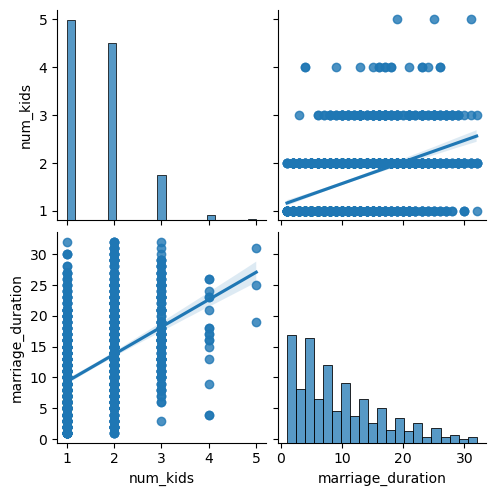

In [15]:
# we can also see that, there is a moderately strong positive relationship between number of kids and 
# marriage duration. let's explore this further.
sns.pairplot(data=divorce, vars=["num_kids", "marriage_duration"], kind="reg")
plt.show()

In [16]:
# we can see that there are no entry for 0 childs i.e, couples with no child.
divorce.num_kids.isna().sum()

876

In [17]:
# if we are sure that these Nan values are for couples with no childs then we can fill them with 0 and 
# calculate the correlation again.

In [18]:
divorce["num_kids"] = divorce.num_kids.fillna(value=0)

In [19]:
divorce.num_kids.isna().sum()

0

In [20]:
divorce.num_kids.value_counts()

num_kids
0.0    876
1.0    621
2.0    550
3.0    142
4.0     17
5.0      3
Name: count, dtype: int64

<Axes: >

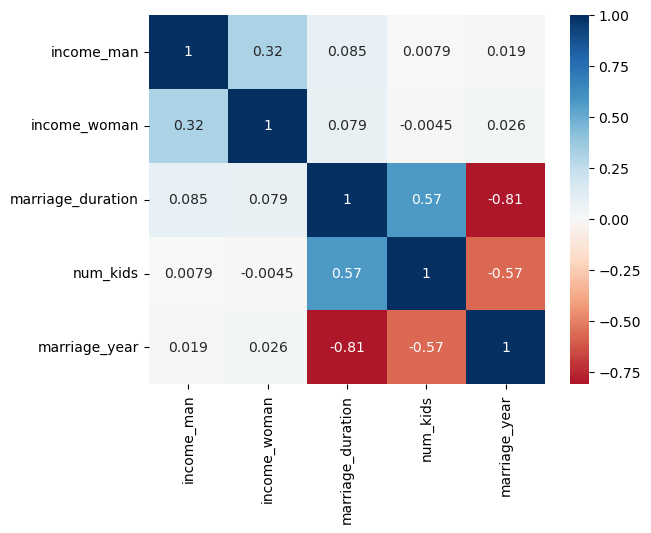

In [21]:
sns.heatmap(divorce.select_dtypes("number").corr(), annot=True, cmap="RdBu", center=0)

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


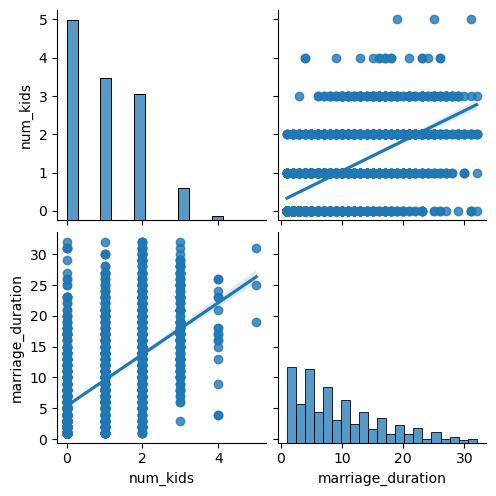

In [22]:
sns.pairplot(data=divorce, vars=["num_kids", "marriage_duration"], kind="reg")

### <a id='toc2_3_'></a>[*Exploring categorical realtionships*](#toc0_)

Categorical variables are harder to summarize numerically, so we often rely on visualizations to explore their relationships.

In [23]:
# Let's take a look at how women's education and age at marriage relate to other variables in the divorce dataframe

In [24]:
divorce

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,0.0,2001
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2000
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,0.0,2006
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,0.0,2007
...,...,...,...,...,...,...,...,...,...,...,...
2204,2006-10-31,1969-11-27,Professional,6000.0,1975-09-01,Professional,14000.0,2002-03-08,4.0,0.0,2002
2205,2006-10-31,1970-09-17,Professional,6000.0,1977-07-22,Professional,6000.0,2002-03-22,4.0,0.0,2002
2206,2011-10-31,1976-03-11,Professional,8000.0,1978-12-28,Professional,7000.0,2009-02-10,2.0,0.0,2009
2207,2012-10-31,1977-10-29,Professional,12500.0,1978-12-01,Professional,6000.0,2008-10-25,3.0,0.0,2008


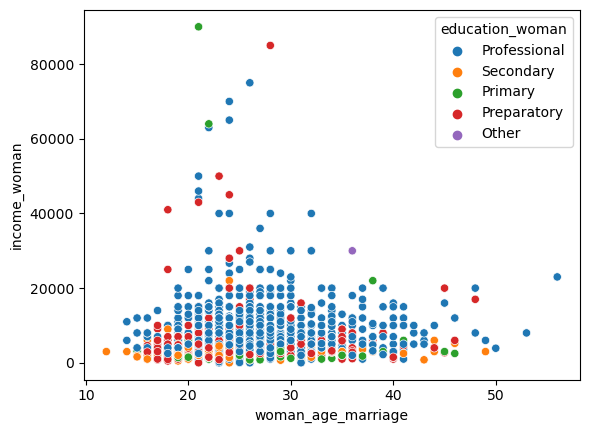

In [25]:
# we can use the hue argument in a scatterplot to view the effect of a categorical variable
# let's explore the relationship between a woman's salary and education level along with 
# the relationship between age at marriage and the education level
divorce["woman_age_marriage"] = divorce["marriage_date"].dt.year - divorce["dob_woman"].dt.year
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman", hue_order=["Professional", "Secondary", "Primary", "Preparatory", "Other"])
plt.show()

In [26]:
# it looks like there is a positive correlation between professional education and higher salaries, 
# as you might expect. The relationship between women's age at marriage and education level is a 
# little less clear. Although most of the women that married after 25 have Professional level education 
# but from the plot it is also evident that most of the observations i.e, womens, have professional
# level of education

In [27]:
# say we are interested in the relationship between marriage duration and the number of kids that a couple has. 
# Since values in the num_kids column range only from one to five, we can plot the KDE for each value on the 
# same plot.

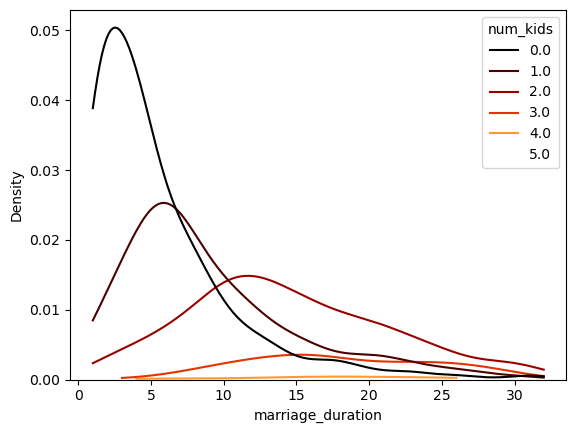

In [28]:
# Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual. 
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, palette="gist_heat")
plt.show()

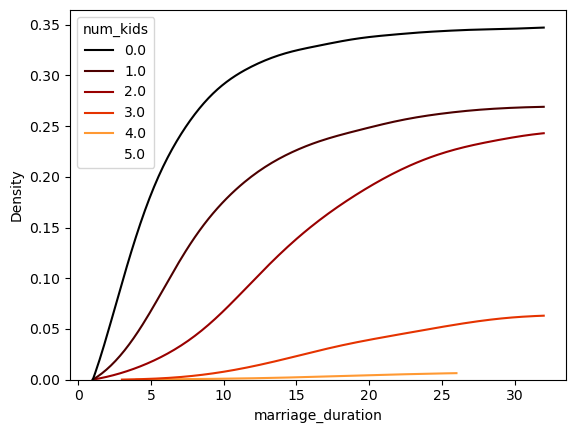

In [29]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, palette="gist_heat", cumulative=True)
plt.show()

In [30]:
divorce.num_kids.value_counts()

num_kids
0.0    876
1.0    621
2.0    550
3.0    142
4.0     17
5.0      3
Name: count, dtype: int64

In [31]:
# It looks as though there is a positive correlation between longer marriages and more children,
# but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more 
# than two children; this helps us understand how reliable our findings are.